<font color='cyan'>**Gradient Descent**</font>
***

In [117]:
import matplotlib.pyplot as plt
import torch
from torchviz import make_dot

In [118]:
x = torch.tensor([1.0], requires_grad = True)
y = x ** 2

**backward** calcula el gradiente de **y** con respecto a **x** en el punto dado

In [119]:
y.backward()
x.grad

tensor([2.])

**Gradient Descent** iterativo

In [120]:
y_values = []
lr = 0.1

for epoch in range(15):

    x.grad.zero_()

    y = x ** 2
    y.backward()

    with torch.no_grad():
        x -= lr * x.grad

    y_values.append(y.item())
    print(y)

tensor([1.], grad_fn=<PowBackward0>)
tensor([0.6400], grad_fn=<PowBackward0>)
tensor([0.4096], grad_fn=<PowBackward0>)
tensor([0.2621], grad_fn=<PowBackward0>)
tensor([0.1678], grad_fn=<PowBackward0>)
tensor([0.1074], grad_fn=<PowBackward0>)
tensor([0.0687], grad_fn=<PowBackward0>)
tensor([0.0440], grad_fn=<PowBackward0>)
tensor([0.0281], grad_fn=<PowBackward0>)
tensor([0.0180], grad_fn=<PowBackward0>)
tensor([0.0115], grad_fn=<PowBackward0>)
tensor([0.0074], grad_fn=<PowBackward0>)
tensor([0.0047], grad_fn=<PowBackward0>)
tensor([0.0030], grad_fn=<PowBackward0>)
tensor([0.0019], grad_fn=<PowBackward0>)


In [121]:
x

tensor([0.0352], requires_grad=True)

Text(0, 0.5, 'y')

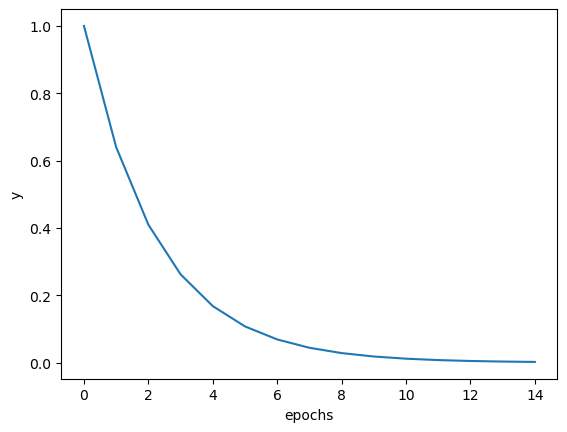

In [122]:
plt.plot(y_values)

plt.xlabel("epochs")
plt.ylabel("y")

<font color='cyan'>**Autograd**</font>
***

In [123]:
x = torch.tensor(2., requires_grad = True)
y = torch.tensor(4., requires_grad = True)
z = torch.tensor(1., requires_grad = True)
w = torch.tensor(3., requires_grad = True)

In [124]:
f = - (torch.max(z, x ** 2) + 2 * w * y)

In [125]:
f.backward()

In [126]:
print(x.grad, y.grad, z.grad, w.grad)

tensor(-4.) tensor(-6.) tensor(0.) tensor(-8.)


**Optimizer para minimizar**

In [127]:
losses = []

In [128]:
optimizer = torch.optim.SGD([x,y,z,w], lr = 0.001)

for epoch in range(41):

    optimizer.zero_grad()

    f = - (torch.max(z, x ** 2) + 2 * w * y)
    loss = f ** 2

    losses.append(loss.item())

    loss.backward()
    optimizer.step()

    if epoch % 10 == 0: print("epoch", epoch, "| loss = ", loss)

epoch 0 | loss =  tensor(784., grad_fn=<PowBackward0>)
epoch 10 | loss =  tensor(50.4492, grad_fn=<PowBackward0>)
epoch 20 | loss =  tensor(12.4855, grad_fn=<PowBackward0>)
epoch 30 | loss =  tensor(3.8517, grad_fn=<PowBackward0>)
epoch 40 | loss =  tensor(1.2322, grad_fn=<PowBackward0>)


In [129]:
#make_dot(f, params={"x": x, "y": y, "z":z, "w":w})

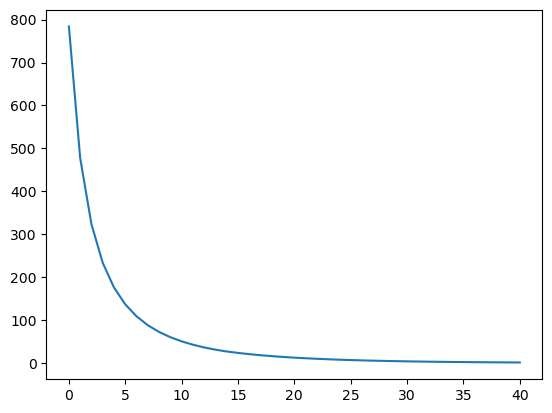

In [130]:
plt.plot(losses)

<font color='cyan'>**TorchViz**</font>
***

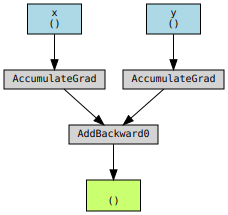

In [131]:
x = torch.tensor(2.0, requires_grad = True)
y = torch.tensor(3.0, requires_grad = True)

if x < 1:
    z = x * y
else:
    z = x + y

# Visualización del grafo de cómputo
make_dot(z, params={"x": x, "y": y})

<font color='cyan'>**IF Clásico**</font>
***

In [132]:
x = torch.tensor(3., requires_grad = True)
y = torch.tensor(1., requires_grad = True)

In [133]:
z = 0

if x > 0:
    z = y ** 2
else:
    z = x ** 2

z.backward()

In [134]:
z

tensor(1., grad_fn=<PowBackward0>)

In [135]:
x.grad, y.grad

(None, tensor(2.))

<font color='cyan'>**Smooth IF**</font>
***

In [136]:
x = torch.tensor(3., requires_grad = True)
y = torch.tensor(1., requires_grad = True)

In [137]:
condicion = x
sigmoid = torch.sigmoid(100 * condicion)    # 1 si cond > 0, sino 0

In [138]:
z = sigmoid * (y ** 2) + (1 - sigmoid) * (x ** 2)
z.backward()

In [139]:
z

tensor(1., grad_fn=<AddBackward0>)

In [140]:
x.grad, y.grad

(tensor(0.), tensor(2.))

In [141]:
def smooth_if(cond, a, b):

    '''retorna a si cond > 0, sino retorna b'''
    
    sigmoid = torch.sigmoid(100 * cond)
    return sigmoid * a + (1 - sigmoid) * b


<font color='cyan'>**Smooth Max**</font>
***

In [142]:
v = torch.tensor([1., 3., 2., 1.], requires_grad = True)
v

tensor([1., 3., 2., 1.], requires_grad=True)

In [143]:
alpha = 1
weights = torch.softmax(alpha * v, dim = 0)
weights

tensor([0.0826, 0.6103, 0.2245, 0.0826], grad_fn=<SoftmaxBackward0>)

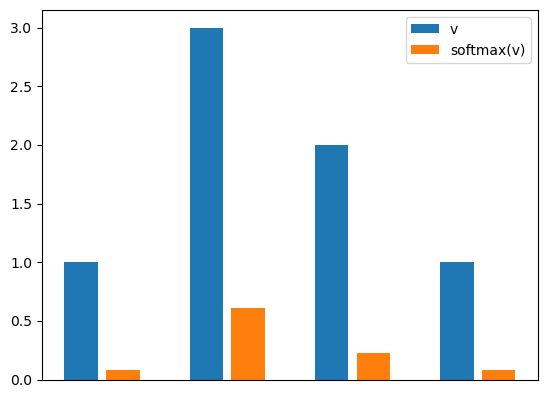

In [144]:
plt.bar([0,3,6,9], v.detach().numpy(), width = 0.8, label = "v")
plt.bar([1,4,7,10], weights.detach().numpy(), width = 0.8, label = "softmax(v)")

plt.xticks([])
plt.legend()

In [145]:
def smooth_max(v, alpha = 10):
    weights = torch.softmax(alpha * v, dim = 0)
    return (weights * v).sum()

In [146]:
smooth_max(v)

tensor(3.0000, grad_fn=<SumBackward0>)